# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

### Load the dataset

In [2]:
data = pd.read_csv('USA_Housing.csv')
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


### Check the shape of the dataset

In [3]:
data.shape
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Get the info regarding column datatypes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


### Get summary statistics for the numerical columns

In [10]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

Text(0.5, 1.0, 'Plot of Avg. Area Income features')

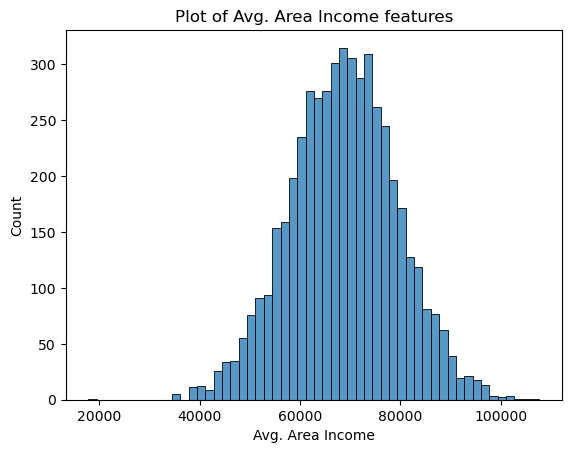

In [15]:
#These are all the numerical features below
#'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population', 'Price'
sns.histplot(data['Avg. Area Income'])
plt.title('Plot of Avg. Area Income features')
#sns.histplot(data = wine_data2, x = 'fixed acidity',color = 'g')

Text(0.5, 1.0, 'Plot of Avg. Area House Age features')

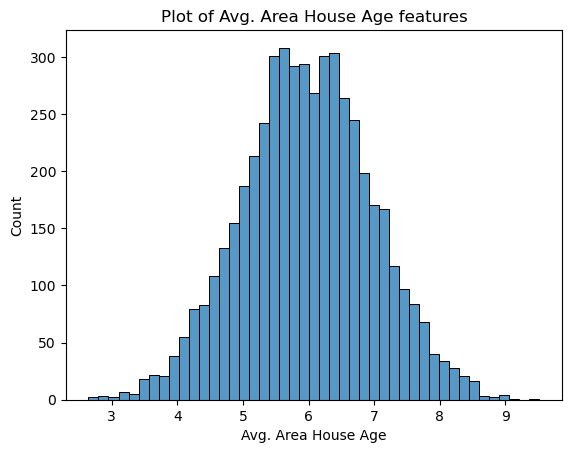

In [16]:
sns.histplot(data['Avg. Area House Age'])
plt.title('Plot of Avg. Area House Age features')

Text(0.5, 1.0, 'Plot of Avg. Area Number of Rooms features')

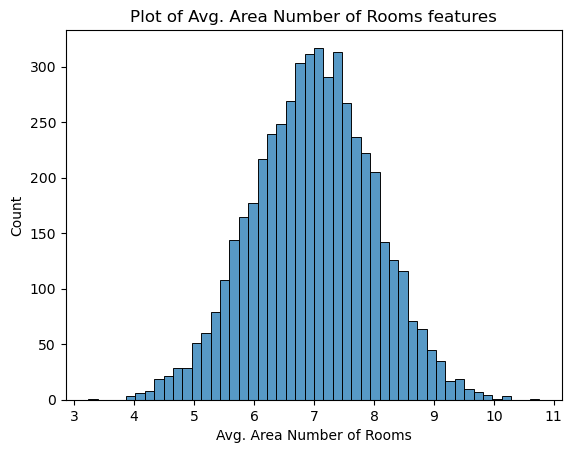

In [17]:
sns.histplot(data['Avg. Area Number of Rooms'])
plt.title('Plot of Avg. Area Number of Rooms features')

Text(0.5, 1.0, 'Plot of Avg. Area Number of Bedrooms features')

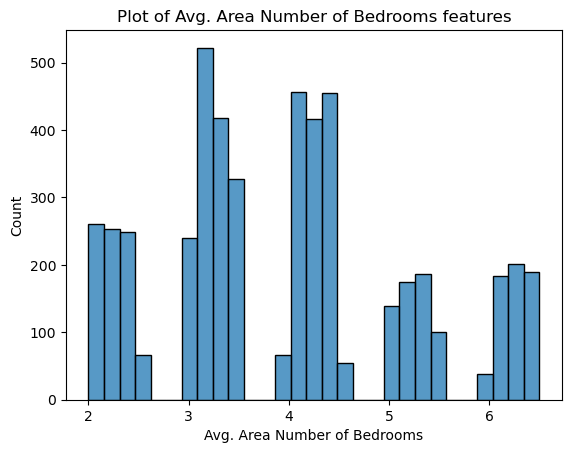

In [18]:
sns.histplot(data['Avg. Area Number of Bedrooms'])
plt.title('Plot of Avg. Area Number of Bedrooms features')

Text(0.5, 1.0, 'Plot of Area Population features')

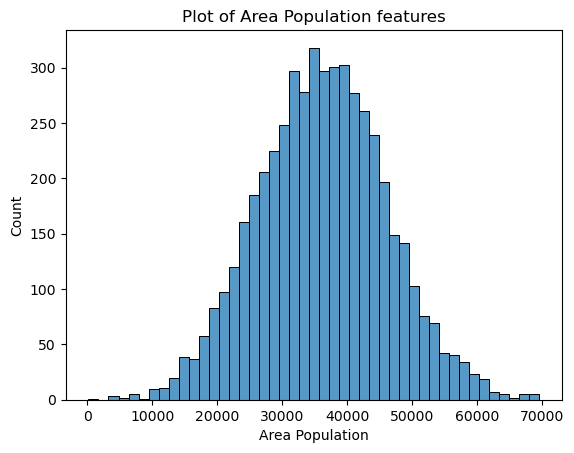

In [19]:
sns.histplot(data['Area Population'])
plt.title('Plot of Area Population features')

Text(0.5, 1.0, 'Plot of Price features')

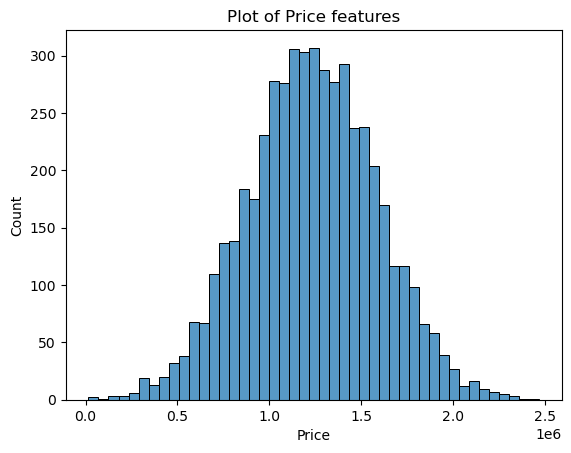

In [20]:
sns.histplot(data['Price'])
plt.title('Plot of Price features')

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

<Axes: xlabel='Avg. Area Number of Rooms', ylabel='Avg. Area Number of Bedrooms'>

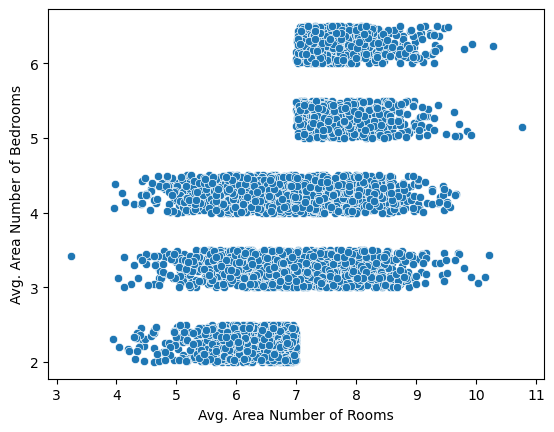

In [9]:
sns.scatterplot(data=data, x = 'Avg. Area Number of Rooms', y = 'Avg. Area Number of Bedrooms' )

**Plot the correlation heatmap and list your observations.**

In [7]:
#using only numerical features for my correlation visualization
data_corr = data.select_dtypes(include = 'number')
new_corr = data_corr.corr()
new_corr

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

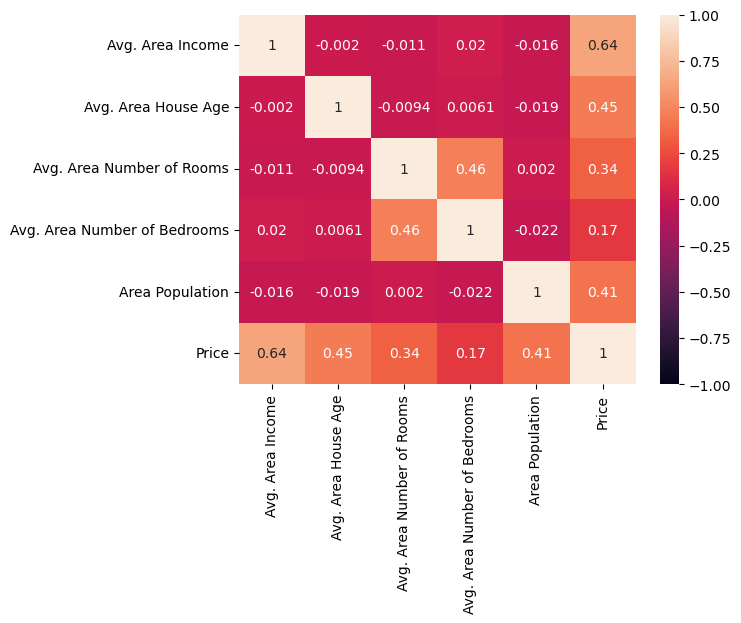

In [8]:
#using heatmap to visualised the only numerical features correlation of the data 
sns.heatmap(new_corr, vmin= -1, vmax= 1,cmap= 'Spectral', annot =True)

### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [13]:
#find the log for the target data
data['new_price']=np.log(data['Price'])
data['new_price']

0       13.872867
1       14.224895
2       13.872824
3       14.047112
4       13.354972
          ...    
4995    13.873962
4996    14.209320
4997    13.845777
4998    13.996712
4999    14.077067
Name: new_price, Length: 5000, dtype: float64

In [16]:
#the x is for features data while i drop or remove price and address column
x = data.drop(['Price','Address'], axis =1)

#the y is showing the target data only which is price
y = data['Price']

In [17]:
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,new_price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,13.872867
1,79248.642455,6.002900,6.730821,3.09,40173.072174,14.224895
2,61287.067179,5.865890,8.512727,5.13,36882.159400,13.872824
3,63345.240046,7.188236,5.586729,3.26,34310.242831,14.047112
4,59982.197226,5.040555,7.839388,4.23,26354.109472,13.354972
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,13.873962
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,14.209320
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,13.845777
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,13.996712


In [18]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 0)

In [21]:
print('X_train ',X_train.shape)
print('X_test ', X_test.shape)

X_train  (4000, 6)
X_test  (1000, 6)


In [ ]:
Scaler_t = MinMaxScaler()
X_train_scal = Scaler_t.fit_transform(X_train)
X_test_scal =Scaler_t.transform(X_test)

### Model Building

**Fit the model to the training set**

**Get the score on training set**

**Write your own function for the R-squared score.**

**Get the score on test set**

**Get the RMSE on test set**

**Get the model coefficients.**

**Automate the equation of the fit**